<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機率 (Property)


## 概念

自**事件空間(universe of events)**中挑出某些事件(events)，並衡量其中不確定性得一種量化方式。


```
P(E)：事件E的機率
```



## 相依與獨立

### 相依性 (dependent)
「事件E是否發生」可以協助判斷「事件F是否發生」  
  
範例：  
「第一次丟出正面」的機率是1/2，「兩次都丟出反面」的機率是1/4
但「第一次丟出正面，而且兩次都丟出反面」的機率為0→非獨立事件

### 獨立性 (independent)
「事件E是否發生」無法協助判斷「事件F是否發生」
  
範例：  
丟兩次銅板，即使第一次丟出正面，並無法知道第二次丟出正面會不會發生
數學上：如果E跟F這兩個事件全部發生的機率，正好等於兩個事件個別發生機率的乘積。即可認為這兩個事件是獨立的。


```
P(E,F) = P(E)P(F)
```



# 條件機率(conditional probability)

## E跟F兩個事件是獨立的
```
P(E,F) = P(E)P(F)
```

## E跟F兩個事件是不一定是獨立的


「在F條件下」E發生的機率


```
P(E|F) = P(E,F)/P(F)
```



如果知道**已經發生事件F**，則發生事件E的機率是P(E|F)


```
P(E|F) = P(E,F)P(F)
```



若事件E和F是互相獨立的，則式子會變成這樣：


```
P(E|F) = P(E)
```
即事件F沒有發生對於我們要判對事件E會不會發生沒有任何幫助


## 範例：兩個小孩(性別未知)的一個小家庭
* 每個小孩究竟是男生或女生，其性別機率是一樣的
* 第二個小孩的性別，與第一個小孩的性別無關
  
可以得知：
* 「兩個都是男生」的機率：1/4
* 「 一男一女 」的機率：1/2
* 「兩個都是女生」的機率：1/4

### 1.
條件(G)：「大的那個小孩是女生」(*已發生的獨立事件*)  
機率(B)：「兩個都是女生」  
  
根據條件機率的定義計算如下：  


```
P(B|G) = P(B,G)/P(G) = P(B)/P(G) = 1/2
```
事件B跟G都發生的機率，其實就等於事件B(兩個都是女生)的機率 P(B)


### 2.
條件(L)：「至少有一個是女生」  
機率(B)：「兩個都是女生」  
  
根據條件機率的定義計算如下：  


```
P(B|L) = P(B,L)/P(L) = P(B)/P(L) = 1/3
```
「至少有一個是女生」，需要考慮：
* 「 一男一女 」的機率：1/2
* 「兩個都是女生」的機率：1/4
→總機率P(L) = 1/2+1/4 = 3/4


## 利用Python來檢查以上結果是否正確

In [ ]:
import enum,random
# Enum 指的是一組具有特定型別的列舉值
# 我們可以運用它讓程式碼更具有可讀性與說明效果

class Kid(enum.Enum):
  BOY = 0
  GIRL = 1

def random_kid() -> Kid:
  return random.choice([Kid.BOY,Kid.GIRL])

random.seed(0)

older_girl = 0
both_girls = 0
either_girl = 0

for _ in range(10000):
  younger = random_kid()
  older  = random_kid()

  if older == Kid.GIRL:
    older_girl += 1
  if older == Kid.GIRL and younger == Kid.GIRL:
    both_girls += 1
  if older == Kid.GIRL or younger == Kid.GIRL:
    either_girl += 1  

In [ ]:
print("P(both | older):",both_girls/older_girl)  # 機率大約等同1/2
print("P(both | either):",both_girls/either_girl) # 機率大約等同1/3

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


# 貝氏定理 (Baye's theorem)
事件F已發生的條件下，發生事件E的機率。

已知事件E發生的條件下，發生事件F的機率。  
只要連續使用兩次條件機率的公式就可以得到：


```
P(E|F) = P(E,F)/P(F) = P(F|E)P(E)/P(F)
```
我們可以把事件F拆分成兩個**互斥**的事件
* 「F發生且F發生」 (F and E)
* 「F發生且F沒發生」 (F and ¬E)

則事件F可以被改寫為：
```
P(F) = P(F,E)+P(F,¬E)
```

套入原本的P(E|F)，就能得到下面的式子：


```
P(E|F) = P(F|E)P(E) / [P(F|E)P[E)+P(F|¬E)P(¬E)]
```







### 範例
假設10000人中，有一人會罹患某種疾病。  
可能我們已經找到可以檢測出該疾病的方法，而且檢測結果有99%的正確率。  
(若罹患該疾病，檢測結果會呈現「陽性」，否則呈現「陰性」)  
  
* 事件T：檢驗結果為陽性
* 事件D：罹患該疾病  
  
根據貝氏定理，在檢測結果為陽性的條件下，罹患該疾病的機率為：
```
P(D|T) = P(T|D)P(D) / [P(T}D)P[D)+P(T|¬D)P(¬D)]
```


已知：  
* P(D)  「罹患該疾病」的機率：0.0001
* P(¬D)  「未罹患該疾病」的機率：0.9999
* P(T|D) 「罹患該疾病的情況下，檢測結果為陽性」的機率：0.99
* P(T|¬D) 「未罹患該疾病的情況下，檢測結果為陽性」的機率：0.01

帶入貝氏定理的公式，得到：


```
P(D|T)=0.98%
```
代表「檢測結果為陽性」的情況下，確實罹患該疾病的機率不到1%



# 隨機變數
是一種變數，其可能的值與機率分布有關

## 期望值
每個值以其相應機率加權後所計算出來的平均值

# 離散分佈(discrete distribution)
每一個離散的結果都對應到一個正值的機率


# 均勻分佈 (uniform distribution)
從0到1所有的數值，全都具有相同的權重

## 機率密度函數 (PDF,probability density function)
用以表示連續分佈

In [2]:
def uniform_pdf(x:float) -> float:
  return 1 if 0 <= x else 0

## 累積分佈函數 (CDF,cumulative density function)
表示某個數值小於或等於某個數值的機率

In [3]:
def uniform_cdf(x:float) -> float:
  if x < 0 : return 0  #均勻分佈隨機變數絕不會小於0
  elif x < 1: return x  #舉例來說，P(X<=0.4) =0.4
  else:      return 1  #均勻分佈隨機變數永遠小於1

### 圖 6-1 
均勻分布的CDF累積分佈函數

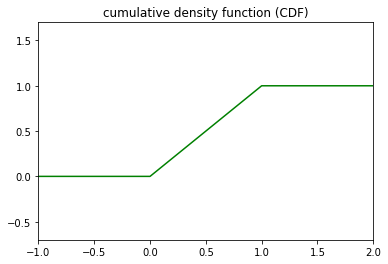

In [ ]:
import matplotlib.pyplot as plt

X=[-1,-0.5,0,0.5,1,1.5,2]
Y=[uniform_cdf(num) for num in X]

plt.plot(X,Y,color="green")
plt.axis([-1,2,-0.7,1.7])
plt.title("cumulative density function (CDF)")
plt.show()


## 常態分布 (normal distribution)
是一種典型的鐘形曲線分佈，可由兩個參數決定：
* 平均值 (μ)
* 標準差 (σ)

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/6fa0f3778df769845a3862bd22921041c18dd79a)
  
在程式碼的實作如下圖：

In [4]:
import math
SQRT_TWO_PI = math.sqrt(2* math.pi)

def normal_pdf(x:float,mu:float=0,sigma:float=1) ->float:
  return (math.exp(-(x-mu)**2/2/sigma**2)/(SQRT_TWO_PI*sigma))

### 圖 6-2
幾個不同的常態分佈PDF機率密度曲線

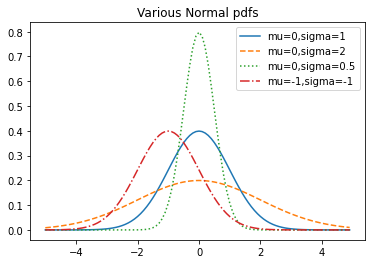

In [6]:
import matplotlib.pyplot as plt
xs=[x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=-1')
plt.legend() # The call signatures correspond to three different ways how to use this method.
plt.title("Various Normal pdfs")
plt.show()

## 標準常態分佈
μ= 0 且 σ = 1


## 其他常態分佈

```
X = σZ+μ
```
則可以推得：
```
Z = (X-μ)/σ
```


## 中央極限定理